In [1]:
#import 'Pandas' 
import pandas as pd 

#import 'Numpy' 
import numpy as np

#import subpackage of Matplotlib
import matplotlib.pyplot as plt

#import 'Seaborn' 
import seaborn as sns

#to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

#display all columns of the dataframe
pd.options.display.max_columns = None

#display all rows of the dataframe
pd.options.display.max_rows = None
 
#to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

#import train-test split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNetCV
from scipy.stats import boxcox
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_selection import SelectKBest,f_regression,RFECV

#import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.tools import add_constant
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import KFold, cross_val_score


#import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

#'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
df_original = pd.read_csv('USA_Housing.csv')
df = df_original

In [5]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.090000,23086.800503,1059033.557870,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.090000,40173.072174,1505890.914847,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


**checking Datatype and Missing Values**<br>
1. We have total of 7 columns and 6 numeric columns and 1 object column<br>
2. There is no missing value<br>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1232072.654142
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,353117.626581
min,17796.631190,2.644304,3.236194,2.000000,172.610686,15938.657923
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,997577.135049
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1232669.377966
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1471210.204212
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2469065.594175


In [9]:
df_numeric = df.select_dtypes(include='float64')
df_numeric.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.090000,23086.800503,1059033.557870
1,79248.642455,6.002900,6.730821,3.090000,40173.072174,1505890.914847


In [ ]:
## Checking Linearity with Target column

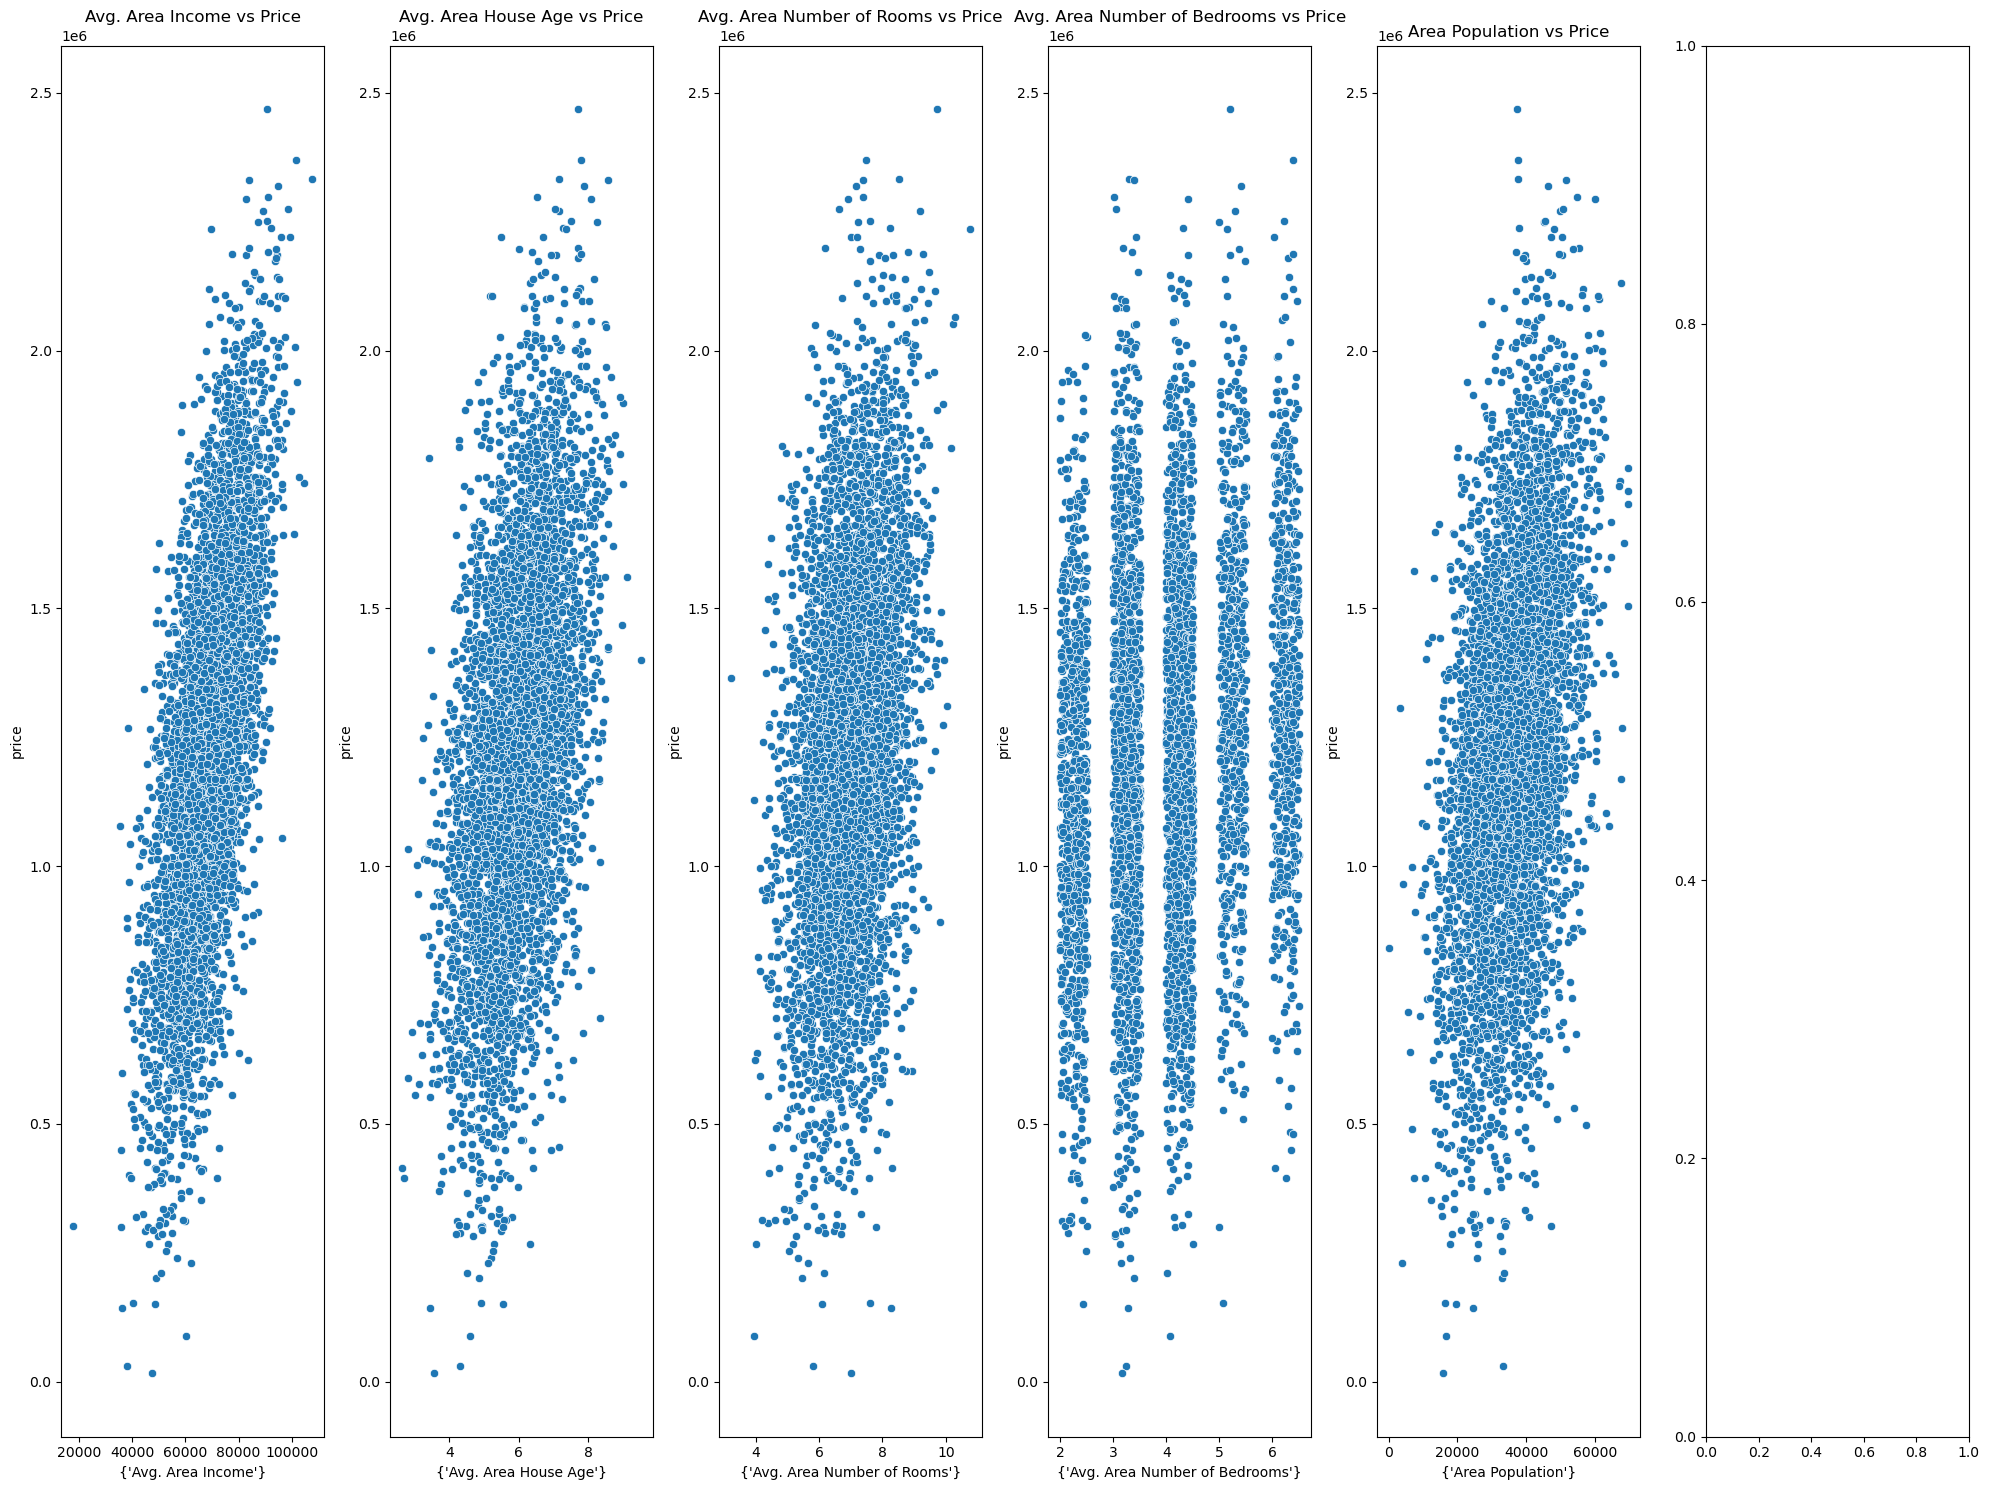

In [11]:
fig,ax = plt.subplots(1,6,figsize =(20,15))
ax = ax.flatten()
for i,col in enumerate(df_numeric):
    if col !='Price':
        sns.scatterplot(data=df_numeric,x=col,y='Price',ax=ax[i])
        ax[i].set_title(f"{col} vs Price")
        ax[i].set_xlabel({col})
        ax[i].set_ylabel("price")
plt.tight_layout()   
plt.show()

In [ ]:
## Checking the outlier using boxplot

In [15]:
# df_predictor = df_numeric.drop(columns='Price')
# df_target = df_numeric['Price']

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'Avg. Area Income'),
  Text(2, 0, 'Avg. Area House Age'),
  Text(3, 0, 'Avg. Area Number of Rooms'),
  Text(4, 0, 'Avg. Area Number of Bedrooms'),
  Text(5, 0, 'Area Population'),
  Text(6, 0, 'Price')])

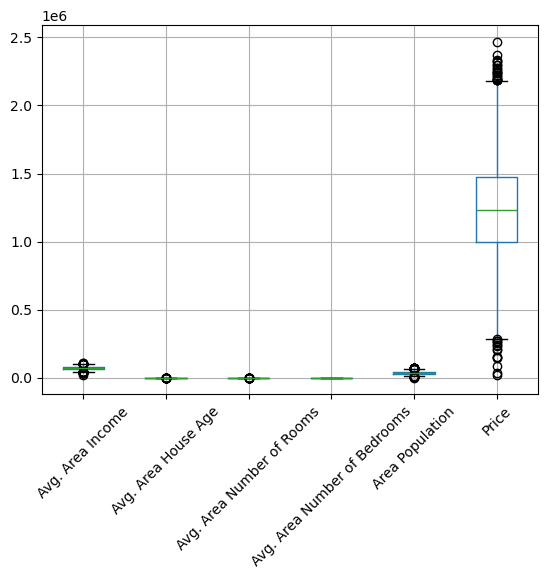

In [13]:
df_numeric.boxplot()
plt.xticks(rotation = 45)

In [15]:
q1_q3 = df_numeric.quantile([0.25,0.50,0.75,0.95])
q1 = q1_q3.loc[0.25]
q3 = q1_q3.loc[0.75]
q6 = q1_q3.loc[0.95]
IQR = q3-q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

In [17]:
lower_bound

Avg. Area Income                40026.397972
Avg. Area House Age                 3.329495
Avg. Area Number of Rooms           4.249318
Avg. Area Number of Bedrooms        1.115000
Area Population                  9217.885601
Price                          287127.531305
dtype: float64

In [19]:
upper_bound

Avg. Area Income                 97237.503083
Avg. Area House Age                  8.643597
Avg. Area Number of Rooms            9.715803
Avg. Area Number of Bedrooms         6.515000
Area Population                  63047.333870
Price                          2181659.807956
dtype: float64

**We are removing outliers because linear models are sensitive to extreme values, which can disproportionately affect model fitting.**

**Important:** Before excluding outliers, it is essential to consult with business stakeholders to ensure that valuable information is not lost. Alternatively, you can use RobustScaler, which helps the model learn better by reducing the influence of outliers—since robust scaling uses the median and interquartile range (IQR) rather than the mean and standard deviation

In [21]:
mask=((df_numeric >= lower_bound) & ( df_numeric <= upper_bound)).all(axis=1)
no_outliers = df_numeric[mask]
len(no_outliers)

4865

In [23]:
df_numeric['Price'].mean()

1232072.654142357

In [25]:
df_numeric['Price'].std()

353117.6265810608

In [27]:
outliers = df_numeric[(df_numeric['Price'] > upper_bound['Price']) | (df_numeric['Price'] < lower_bound['Price'])]
sort=outliers.sort_values(by='Price',ascending=True)
sort.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
3212,47320.657205,3.558054,7.006987,3.160000,15776.618595,15938.657923
1271,37971.207566,4.291224,5.807510,3.240000,33267.767728,31140.517620
1799,60167.672607,4.590613,3.950973,4.060000,16811.303292,88591.770160
1459,35963.330809,3.438547,8.264122,3.280000,24435.777302,143027.364452
1661,48735.924512,5.543730,6.091906,2.430000,19682.347295,151527.082627


**I observed that there is no data entry error. All the values are consistent, and the correlations are in the same direction.**

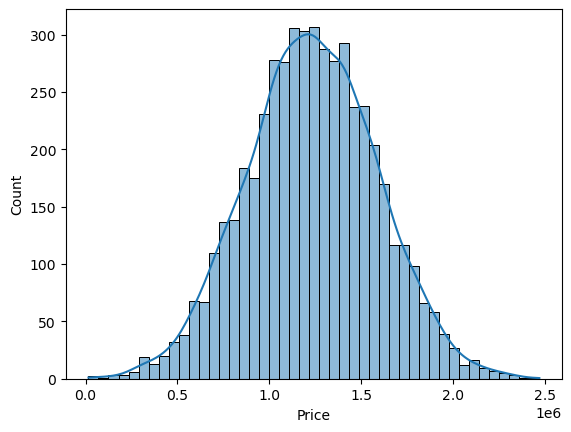

In [29]:
sns.histplot(data = df_numeric,x=df_numeric['Price'],kde=True)
plt.show()

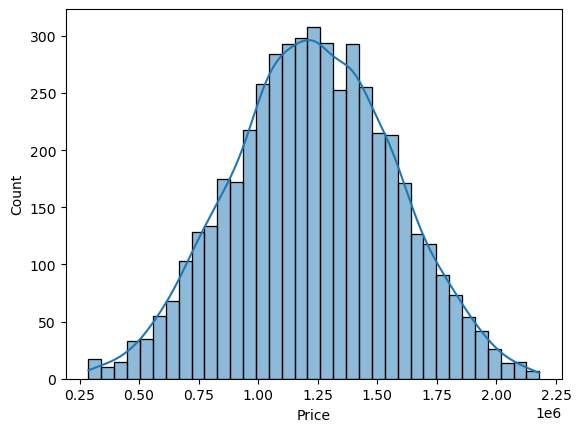

In [31]:
sns.histplot(data = no_outliers,x=no_outliers['Price'],kde=True)
plt.show()

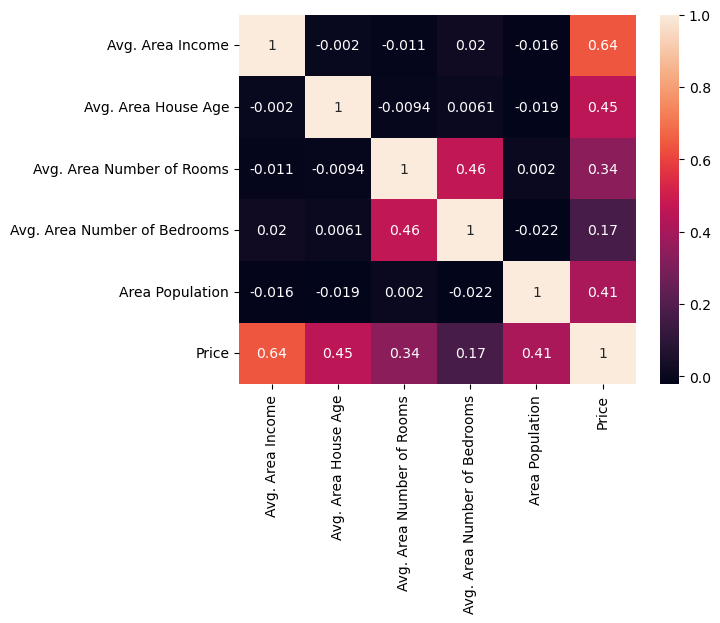

In [319]:
sns.heatmap(df_numeric.corr(),annot=True)
plt.show()

In [33]:
df_numeric.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


We can observe that some independent variables have a strong or moderate correlation with the dependent variable (Price). For example, Avg. Area Income shows a strong positive correlation, while Avg. Area House Age and Area Population have moderate correlations. On the other hand, Avg. Area Number of Rooms and Avg. Area Number of Bedrooms exhibit weak correlations with Price.

**Positive correlation** means that as independent variable increase the dependent variable tend to increase in the positive direction.<br>
**Negative Correlation** means that as independent variable increase the dependent variable tend to Decrease in the negative direction.<br>
**Important** : We can't say exactly Amount,how much it will vary. for that we need to do the regression co-efficient from regression Analysis.(Correlation tells you if the relationship is positive or negative and how strong it is, but not the direct unit change)<br>



## Preparing Data for linear regression


## Assumption of linearity check
**1. Independent and Dependent Variables Should Be Numeric.**<br>
Linear regression assumes a linear relationship between the input (independent variables) and the output (dependent variable). It requires all variables to be numeric. If the dataset contains variables on different scales, it's important to apply scaling techniques (e.g., standardization or log transformation) to bring them onto a similar scale and improve model performance.

**2. No Multicollinearity Among Independent Variables**<br>
Multicollinearity occurs when independent variables are highly correlated with each other, meaning they provide redundant information. This can distort the interpretation of coefficients and reduce the model’s reliability.

To ensure each variable contributes unique information to the prediction, we assess multicollinearity using the Variance Inflation Factor (VIF). A VIF value less than 5 generally indicates that multicollinearity is not a concern, and the variable is contributing independently to the target. In case of high VIF values, we may need to drop or combine variables to improve model stability.

**I am planning to create two model with and without outliers**

In [35]:
df_numeric.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
dtype: object

In [37]:
no_outliers.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
dtype: object

In [39]:
df_input_full = df_numeric.drop(columns='Price')
df_output_full = df_numeric['Price']

In [41]:
df_feature_nooutliers = no_outliers.drop(columns='Price')
df_output = no_outliers['Price']

In [43]:
vif_data =  pd.DataFrame()
vif_data['Feature'] = df_input_full.columns
vif_data['output'] = [variance_inflation_factor(df_input_full.values,i) for i in range(df_input_full.shape[1])]

In [45]:
vif_data

,Feature,output
0,Avg. Area Income,29.650899
1,Avg. Area House Age,27.447775
2,Avg. Area Number of Rooms,45.257291
3,Avg. Area Number of Bedrooms,14.537873
4,Area Population,12.825450


In [47]:
vif_data_nooutliers =  pd.DataFrame()
vif_data_nooutliers['Feature'] = df_feature_nooutliers.columns
vif_data_nooutliers['output'] = [variance_inflation_factor(df_feature_nooutliers.values,i) for i in range(df_feature_nooutliers.shape[1])]

In [49]:
vif_data_nooutliers

,Feature,output
0,Avg. Area Income,31.070226
1,Avg. Area House Age,28.477215
2,Avg. Area Number of Rooms,47.248494
3,Avg. Area Number of Bedrooms,14.594100
4,Area Population,13.522401


**From the Variance Inflation Factor (VIF) table:**

All features exhibit high multicollinearity (VIF > 10), indicating redundancy among predictors.

This means that some features carry overlapping information and are not uniquely contributing to the model.

To further validate the relevance of each feature, feature selection techniques were applied:

**SelectKBest with f_regression (ANOVA F-test):**

Null Hypothesis (H₀): All features contribute equally to the target.

Alternative Hypothesis (H₁): At least one feature contributes differently.

All p-values = 0.0000 → we reject H₀ for each feature.

All features show statistically significant contribution to the target (Price).

Highest F-scores:

Avg. Area Income: 2775.96

Avg. Area House Age: 1058.06

Area Population: 838.46

**Recursive Feature Elimination with Cross Validation (RFECV):**

This method also retained all the features, reinforcing the result that each variable contributes meaningful predictive power in the presence of others.

In [51]:
X_train,X_test,y_train,y_test =  train_test_split(df_input_full,df_output_full,test_size=0.20,random_state=20)
X_train_nooutlier,X_test_nooutlier,y_train_nooutlier,y_test_nooutlier = train_test_split(df_feature_nooutliers,df_output,test_size=0.20,random_state=20)

#Feature Selection
selector = SelectKBest(score_func=f_regression,k='all')
X_train_selected = selector.fit_transform(X_train,y_train)

selected_feature_best = X_train.columns[selector.get_support()]

feature_selection = pd.DataFrame({'Feature':X_train.columns,'P_values':selector.pvalues_,'F-Score':selector.scores_})
feature_selection

,Feature,P_values,F-Score
0,Avg. Area Income,0.000000,2775.960612
1,Avg. Area House Age,0.000000,1058.060458
2,Avg. Area Number of Rooms,0.000000,523.291859
3,Avg. Area Number of Bedrooms,0.000000,136.311141
4,Area Population,0.000000,838.463642


In [53]:
lr = LinearRegression()
rfecv = RFECV(estimator=lr,cv=7,scoring='r2')
rfecv.fit(X_train,y_train)

RFECV(cv=7, estimator=LinearRegression(), scoring='r2')

In [55]:
selected_feature = X_train.columns[rfecv.support_]
print("Selected feature",selected_feature.tolist())
print("R2 Explained by model",rfecv.score(X_train,y_train))

print("Optimal number of features:", rfecv.n_features_)
print("Selected features mask:", rfecv.support_)
print("Feature ranking:", rfecv.ranking_)

Selected feature ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
R2 Explained by model 0.9196051969428424
Optimal number of features: 5
Selected features mask: [ True  True  True  True  True]
Feature ranking: [1 1 1 1 1]


In [57]:
scaler_v = StandardScaler()
X_trained_scaled = scaler_v.fit_transform(X_train[selected_feature])
add_x_train = add_constant(X_trained_scaled)
model_linear =sm.OLS(y_train,add_x_train).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     9137.
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        19:13:59   Log-Likelihood:                -51760.
No. Observations:                4000   AIC:                         1.035e+05
Df Residuals:                    3994   BIC:                         1.036e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.236e+06   1595.332    774.895      0.000    1.23e+06    1.24e+06
x1          2.295e+05   1596.531    143.760      0.000    2.26e+05    2.33e+05
x2          1.631e+05   1595.607    102.218      0.000     1.6e+05    1.66e+05
x3          1.223e+05   1805.927     67.704      0.000    1.19e+05    1.26e+05
x4          2530.8660   1806.822      1.401      0.161   -1011.513    6073.245
x5          1.523e+05   1595.937     95.415      0.000    1.49e+05    1.55e+05
==============================================================================
Omnibus:                        4.812   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.265
Skew:                           0.004   Prob(JB):                        0.119
Kurtosis:                       2.840   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
feature_name = ['Const']+list(X_train.columns)
pval_df = pd.DataFrame({'feature_name':feature_name,'P_value':model_linear.pvalues,'Co-efficient':model_linear.params}).reset_index()
pval_df

,index,feature_name,P_value,Co-efficient
0,const,Const,0.000000,1236214.909615
1,x1,Avg. Area Income,0.000000,229517.090654
2,x2,Avg. Area House Age,0.000000,163099.009781
3,x3,Avg. Area Number of Rooms,0.000000,122268.715066
4,x4,Avg. Area Number of Bedrooms,0.161373,2530.865968
5,x5,Area Population,0.000000,152275.828745


In [61]:
yhat_predicted =  model_linear.predict(add_x_train)
train_output = pd.DataFrame({"Y_train":y_train,"Y_hat":yhat_predicted})
train_output['Residuals'] = train_output['Y_train']-train_output['Y_hat']

In [63]:
df_significant  = df_input_full.drop(columns='Avg. Area Number of Bedrooms')

In [65]:
df_significant_without_outliers = df_feature_nooutliers.drop(columns = 'Avg. Area Number of Bedrooms')

In [67]:
X_train_without_outliers_signi,X_test_without_outliers_signi,y_train_without_outliers_signi,y_test_without_outliers_signi = train_test_split(df_significant_without_outliers,
                                                                                      df_output,test_size=0.20,random_state=20)

In [69]:
scaler_v = StandardScaler()
X_trained_scaled_sign = scaler_v.fit_transform(X_train_without_outliers_signi)
add_x_train_signi = add_constant(X_trained_scaled_sign)
model_linear_sign =sm.OLS(y_train_without_outliers_signi,add_x_train_signi).fit()
model_linear_sign.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     9942.
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        19:14:29   Log-Likelihood:                -50383.
No. Observations:                3892   AIC:                         1.008e+05
Df Residuals:                    3887   BIC:                         1.008e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.231e+06   1625.686    757.168      0.000    1.23e+06    1.23e+06
x1          2.224e+05   1626.166    136.744      0.000    2.19e+05    2.26e+05
x2          1.585e+05   1626.746     97.407      0.000    1.55e+05    1.62e+05
x3          1.189e+05   1626.083     73.128      0.000    1.16e+05    1.22e+05
x4          1.439e+05   1626.389     88.453      0.000    1.41e+05    1.47e+05
==============================================================================
Omnibus:                        4.809   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.271
Skew:                           0.012   Prob(JB):                        0.118
Kurtosis:                       2.839   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
add_x_train_signi.shape

(3892, 5)

In [73]:
yhat_predicted_sign =  model_linear_sign.predict(add_x_train_signi)
train_final_sign = pd.DataFrame({"Y_train":y_train_without_outliers_signi,"Y_hat":yhat_predicted_sign})
train_final_sign['Residuals'] = train_final_sign['Y_train']-train_final_sign['Y_hat']

## After model build
**3.Independence of Observations**

 Checked using the Residuals vs. Predicted Values (Ŷ) plot.<br>
 The residuals should be randomly scattered without any visible patterns.<br>
 A random spread indicates that observations are independent.<br>

**4.Absence of Autocorrelation**

 Validated using the Durbin-Watson statistic.<br>
 A value close to 2 suggests no autocorrelation.<br>
 Values substantially below 2 indicate positive autocorrelation, and values above 2 suggest negative autocorrelation.<br>

**5.Homoscedasticity of Errors (Constant Variance)**

 Tested using the Breusch-Pagan test.<br>
 Null Hypothesis (H₀): The error variance is constant (homoscedastic).<br>
 Alternative Hypothesis (H₁): The error variance is not constant (heteroscedastic).<br>
 p-value > 0.05 → Fail to reject H₀ → Homoscedasticity assumption holds.<br>

**6.Normality of Residuals**

 Checked visually using a QQ Plot – residuals should lie along the diagonal line.<br>
 Also tested using the Jarque-Bera test:<br>
 H₀: Residuals are normally distributed.<br>
 H₁: Residuals are not normally distributed.<br>
 p-value > 0.05 → Fail to reject H₀ → Residuals are normally distributed.<br>
    

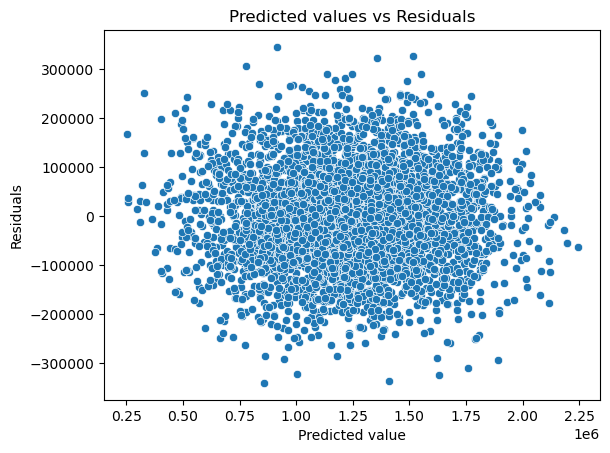

In [75]:
sns.scatterplot(data = train_final_sign,x='Y_hat',y='Residuals')
plt.xlabel("Predicted value")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")
plt.show()

In [77]:
durbin_watson(train_final_sign['Residuals'],axis=0)

1.9445867954356069

In [79]:
bp_test = sms.het_breuschpagan(model_linear_sign.resid,model_linear_sign.model.exog)
bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results = dict(zip(bp_labels, bp_test))

In [81]:
bp_results

{'Lagrange multiplier statistic': 2.859293266581682,
 'p-value': 0.5816416137190032,
 'f-value': 0.7144298551580334,
 'f p-value': 0.5819649194810197}

**P_value** is greater than 0.05(p > 0.05) we fail to reject null hypothesis. The error variance is constant (homoscedastic).

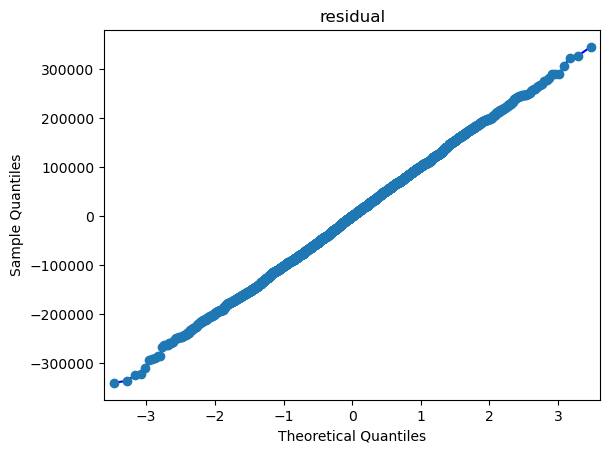

In [83]:
qqplot(data= train_final_sign['Residuals'],linestyle='-')
plt.title("residual")
plt.show()

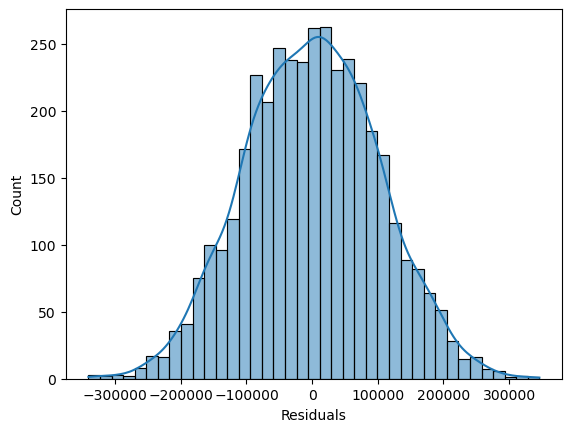

In [85]:
sns.histplot(data=train_final_sign,x=train_final_sign['Residuals'],kde=True)
plt.show()

## Measure of variance

In [87]:
model_data = pd.DataFrame(columns=["model_name","train_mse","train_rmse","test_mse","test_rmse","train_r2","test_r2",
                                   "Adj_r2_train","Adj_r2_test"])

In [89]:
def evaluate(model,X_train,y_train,X_test,y_test,model_name):
    global model_data
    yhat_train_predicted = model.predict(X_train)
    yhat_test_predicted = model.predict(X_test)

    ## Calculate MSE
    train_mse = mean_squared_error(y_train,yhat_train_predicted)

    ## Calculate RMSE
    train_rmse =  np.sqrt(train_mse)

    ## Calculate
    train_r2 = model.score(X_train,y_train)

    ## Calculate Adj-r2
    n=X_train.shape[0]
    k=X_train.shape[1]
    Adj_r2_train = 1-(((1-train_r2)*(n-1))/(n-k-1))

    ## Calculate MSE
    test_mse = mean_squared_error(y_test,yhat_test_predicted)

    ## Calculate RMSE
    test_rmse =  np.sqrt(test_mse)

    ## Calculate
    test_r2 = model.score(X_test,y_test)

    ## Calculate Adj-r2
    n_t=X_test.shape[0]
    k_t=X_test.shape[1]
    Adj_r2_test = 1-(((1-test_r2)*(n_t-1))/(n_t-k_t-1))

    new_data = pd.DataFrame([
       { 
           "model_name":model_name,
           "train_mse":train_mse,
           "train_rmse":train_rmse,
           "test_mse":test_mse,
           "test_rmse":test_rmse,
           "train_r2":train_r2,
           "test_r2":test_r2,
           "Adj_r2_train":Adj_r2_train,
           "Adj_r2_test":Adj_r2_test
           
       }])
    model_data = pd.concat([model_data,new_data],ignore_index=True)
    return model_data 

X_train_without_outliers_signi,X_test_without_outliers_signi,y_train_without_outliers_signi,y_test_without_outliers_signi

In [91]:
pipeline = Pipeline(steps=[("Scaler",StandardScaler()),("model",LinearRegression())])
Linearpipeline=pipeline.fit(X_train_without_outliers_signi,y_train_without_outliers_signi)

In [93]:
evaluate(Linearpipeline,X_train_without_outliers_signi,y_train_without_outliers_signi,X_test_without_outliers_signi,
         y_test_without_outliers_signi,"Type - I Linear_Regression_Without_outlier_sign")

,model_name,train_mse,train_rmse,test_mse,test_rmse,train_r2,test_r2,Adj_r2_train,Adj_r2_test
0,Type - I Linear_Regression_Without_outlier_sign,10272780736.293356,101354.727252,9560124058.169830,97775.886895,0.910961,0.914983,0.910869,0.914632


**By retaining outliers and non-significant predictors, I am verifying the output to observe their impact on the results**
The result is showing as Overfitted Model

X_train,X_test,y_train,y_test 

In [95]:
pipeline_2= Pipeline(steps=[("Scaler",StandardScaler()),("model",LinearRegression())])
Linearpipeline=pipeline_2.fit(X_train,y_train)

In [97]:
evaluate(Linearpipeline,X_train,y_train,X_test,
         y_test,"Type - II Linear_Regression_fulldata")

,model_name,train_mse,train_rmse,test_mse,test_rmse,train_r2,test_r2,Adj_r2_train,Adj_r2_test
0,Type - I Linear_Regression_Without_outlier_sign,10272780736.293356,101354.727252,9560124058.169830,97775.886895,0.910961,0.914983,0.910869,0.914632
1,Type - II Linear_Regression_fulldata,10165064098.757673,100821.942546,10451192937.275997,102231.076182,0.919605,0.910853,0.919505,0.910404


**By retaining non-significant predictors, I am verifying the output to observe their impact on the results.**<br>
The results reveal only a small difference between the “Linear Regression Without Outliers and Significant Variables” and the “Type-III Linear Regression Without Outliers” models. Both the test error and the R² score remain favorable for the “Linear Regression Without Outliers and Significant Variables” model.

X_train_nooutlier,X_test_nooutlier,y_train_nooutlier,y_test_nooutlier 

In [99]:
pipeline_3= Pipeline(steps=[("Scaler",StandardScaler()),("model",LinearRegression())])
Linearpipeline=pipeline_3.fit(X_train_nooutlier,y_train_nooutlier)

In [101]:
evaluate(pipeline_3,X_train_nooutlier,y_train_nooutlier,X_test_nooutlier,
         y_test_nooutlier,"Type - III Linear_Regression_without_Outliers")

,model_name,train_mse,train_rmse,test_mse,test_rmse,train_r2,test_r2,Adj_r2_train,Adj_r2_test
0,Type - I Linear_Regression_Without_outlier_sign,10272780736.293356,101354.727252,9560124058.169830,97775.886895,0.910961,0.914983,0.910869,0.914632
1,Type - II Linear_Regression_fulldata,10165064098.757673,100821.942546,10451192937.275997,102231.076182,0.919605,0.910853,0.919505,0.910404
2,Type - III Linear_Regression_without_Outliers,10266328117.621019,101322.890393,9565248545.573885,97802.088656,0.911017,0.914938,0.910903,0.914498


## Using robustscaler for full dataset with outliers and insignificant variable

In [103]:
pipeline_4 = Pipeline(steps=[("Scaler", RobustScaler()), ("model", LinearRegression())])
Linearpipeline_robust = pipeline_4.fit(X_train, y_train)
evaluate(Linearpipeline_robust, X_train, y_train, X_test, y_test, "Type - IV Linear_Regression_fulldata")

,model_name,train_mse,train_rmse,test_mse,test_rmse,train_r2,test_r2,Adj_r2_train,Adj_r2_test
0,Type - I Linear_Regression_Without_outlier_sign,10272780736.293356,101354.727252,9560124058.169830,97775.886895,0.910961,0.914983,0.910869,0.914632
1,Type - II Linear_Regression_fulldata,10165064098.757673,100821.942546,10451192937.275997,102231.076182,0.919605,0.910853,0.919505,0.910404
2,Type - III Linear_Regression_without_Outliers,10266328117.621019,101322.890393,9565248545.573885,97802.088656,0.911017,0.914938,0.910903,0.914498
3,Type - IV Linear_Regression_fulldata,10165064098.757671,100821.942546,10451192937.275999,102231.076182,0.919605,0.910853,0.919505,0.910404


**Lasso Model:**<br> Lasso regression can be affected by outliers, but it helps reduce the impact of unimportant variables by shrinking their effects. So, I remove outliers from the data before using Lasso to get a better and more reliable model.

Regularization is about balancing the bias and Variance, not just eliminating weak predictors

In [ ]:
X_train_nooutlier,X_test_nooutlier,y_train_nooutlier,y_test_nooutlier

In [105]:
Lasso_model_CV =Pipeline(steps=[("Scaler",StandardScaler()),("model",LassoCV(cv=10,random_state=40))])
Lasso_model_CV.fit(X_train_nooutlier,y_train_nooutlier)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('model', LassoCV(cv=10, random_state=40))])

In [107]:
best_alpha_value=Lasso_model_CV.named_steps['model']

In [109]:
best_alpha_value.alpha_

216.53011566459003

In [111]:
best_alpha_value.coef_


array([222048.01695419, 158184.53904562, 117405.59268434,   2739.07785215,
       143688.12750617])

In [113]:
Lasso_model=Pipeline(steps=[("Scaler",StandardScaler()),("model",Lasso(alpha=best_alpha_value.alpha_))])
Lasso_value=Lasso_model.fit(X_train_nooutlier,y_train_nooutlier)
evaluate(Lasso_value,X_train_nooutlier,y_train_nooutlier,
         X_test_nooutlier,y_test_nooutlier,"Lasso_I-Without Outliers")

,model_name,train_mse,train_rmse,test_mse,test_rmse,train_r2,test_r2,Adj_r2_train,Adj_r2_test
0,Type - I Linear_Regression_Without_outlier_sign,10272780736.293356,101354.727252,9560124058.169830,97775.886895,0.910961,0.914983,0.910869,0.914632
1,Type - II Linear_Regression_fulldata,10165064098.757673,100821.942546,10451192937.275997,102231.076182,0.919605,0.910853,0.919505,0.910404
2,Type - III Linear_Regression_without_Outliers,10266328117.621019,101322.890393,9565248545.573885,97802.088656,0.911017,0.914938,0.910903,0.914498
3,Type - IV Linear_Regression_fulldata,10165064098.757671,100821.942546,10451192937.275999,102231.076182,0.919605,0.910853,0.919505,0.910404
4,Lasso_I-Without Outliers,10266537506.552168,101323.923663,9568375733.887711,97818.074679,0.911015,0.914910,0.910901,0.914470


In [ ]:
## Using Grid search for custom regularization

In [115]:
Lasso_model_grid=Pipeline(steps=[("Scaler",StandardScaler()),("model",Lasso())])
param_grid = {'model__alpha': [0.01,0.1,10,20,50,100,150,200,250,300,350,400]}
grid_search_lasso = GridSearchCV(estimator=Lasso_model_grid,param_grid=param_grid,cv=10,scoring='r2')
Lasso_alpha=grid_search_lasso.fit(X_train_nooutlier,y_train_nooutlier)

In [117]:
Lasso_alpha.best_params_.get('model__alpha')

50

In [119]:
lasso_coefficient=Lasso_model_grid.named_steps['model']

In [121]:
Lasso_model_grid=Pipeline(steps=[("Scaler",StandardScaler()),("model",Lasso(alpha=Lasso_alpha.best_params_.get('model__alpha')))])
Lasso_value_grid=Lasso_model_grid.fit(X_train_nooutlier,y_train_nooutlier)
evaluate(Lasso_value_grid,X_train_nooutlier,y_train_nooutlier,
         X_test_nooutlier,y_test_nooutlier,"Lasso_I-Gridsearch_alpha")

,model_name,train_mse,train_rmse,test_mse,test_rmse,train_r2,test_r2,Adj_r2_train,Adj_r2_test
0,Type - I Linear_Regression_Without_outlier_sign,10272780736.293356,101354.727252,9560124058.169830,97775.886895,0.910961,0.914983,0.910869,0.914632
1,Type - II Linear_Regression_fulldata,10165064098.757673,100821.942546,10451192937.275997,102231.076182,0.919605,0.910853,0.919505,0.910404
2,Type - III Linear_Regression_without_Outliers,10266328117.621019,101322.890393,9565248545.573885,97802.088656,0.911017,0.914938,0.910903,0.914498
3,Type - IV Linear_Regression_fulldata,10165064098.757671,100821.942546,10451192937.275999,102231.076182,0.919605,0.910853,0.919505,0.910404
4,Lasso_I-Without Outliers,10266537506.552168,101323.923663,9568375733.887711,97818.074679,0.911015,0.914910,0.910901,0.914470
5,Lasso_I-Gridsearch_alpha,10266339080.011076,101322.944489,9565916385.844316,97805.502840,0.911017,0.914932,0.910902,0.914492


## Ridge Regression-- Finding the best Alpha value

In [123]:
ridge_model_CV =Pipeline(steps=[("Scaler",StandardScaler()),("model",RidgeCV(cv=7))])
ridge_model_CV.fit(X_train_nooutlier,y_train_nooutlier)

Pipeline(steps=[('Scaler', StandardScaler()), ('model', RidgeCV(cv=7))])

In [125]:
bestalpha_ridge =ridge_model_CV.named_steps['model']

In [127]:
bestalpha_ridge.alpha_

1.0

In [129]:
bestalpha_ridge.coef_

array([222209.19430398, 158368.73694011, 117518.53628817,   2899.26744744,
       143876.76528989])

In [131]:
Ridge_model=Pipeline(steps=[("Scaler",StandardScaler()),("model",Ridge(alpha=bestalpha_ridge.alpha_))])
Ridge_value=Ridge_model.fit(X_train_nooutlier,y_train_nooutlier)
evaluate(Ridge_value,X_train_nooutlier,y_train_nooutlier,
         X_test_nooutlier,y_test_nooutlier,"Ridge_I-Without Outliers")

,model_name,train_mse,train_rmse,test_mse,test_rmse,train_r2,test_r2,Adj_r2_train,Adj_r2_test
0,Type - I Linear_Regression_Without_outlier_sign,10272780736.293356,101354.727252,9560124058.169830,97775.886895,0.910961,0.914983,0.910869,0.914632
1,Type - II Linear_Regression_fulldata,10165064098.757673,100821.942546,10451192937.275997,102231.076182,0.919605,0.910853,0.919505,0.910404
2,Type - III Linear_Regression_without_Outliers,10266328117.621019,101322.890393,9565248545.573885,97802.088656,0.911017,0.914938,0.910903,0.914498
3,Type - IV Linear_Regression_fulldata,10165064098.757671,100821.942546,10451192937.275999,102231.076182,0.919605,0.910853,0.919505,0.910404
4,Lasso_I-Without Outliers,10266537506.552168,101323.923663,9568375733.887711,97818.074679,0.911015,0.914910,0.910901,0.914470
5,Lasso_I-Gridsearch_alpha,10266339080.011076,101322.944489,9565916385.844316,97805.502840,0.911017,0.914932,0.910902,0.914492
6,Ridge_I-Without Outliers,10266335908.903042,101322.928841,9565967083.282145,97805.762015,0.911017,0.914931,0.910902,0.914491


## Elasticnet: here

In [133]:
elasticnet_model_CV =Pipeline(steps=[("Scaler",StandardScaler()),("model",ElasticNetCV(cv=7,l1_ratio=[0.1, 0.5, 0.9]))])
elasticnet_model_CV.fit(X_train_nooutlier,y_train_nooutlier)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('model', ElasticNetCV(cv=7, l1_ratio=[0.1, 0.5, 0.9]))])

In [135]:
bestalpha_elastic = elasticnet_model_CV.named_steps['model']

In [137]:
bestalpha_elastic.alpha_

240.58901740510004

In [139]:
bestalpha_elastic.coef_

array([8638.17985969, 5944.04796245, 4510.60579225, 2415.64655263,
       5492.6467477 ])

In [141]:
bestalpha_elastic.l1_ratio_

0.9

In [143]:
elasticnet_model=Pipeline(steps=[("Scaler",StandardScaler()),("model",ElasticNet(alpha=bestalpha_elastic.alpha_,l1_ratio=bestalpha_elastic.l1_ratio_))])
elasticnet_value=elasticnet_model.fit(X_train_nooutlier,y_train_nooutlier)
evaluate(elasticnet_value,X_train_nooutlier,y_train_nooutlier,
         X_test_nooutlier,y_test_nooutlier,"ElasticNet")

,model_name,train_mse,train_rmse,test_mse,test_rmse,train_r2,test_r2,Adj_r2_train,Adj_r2_test
0,Type - I Linear_Regression_Without_outlier_sign,10272780736.293356,101354.727252,9560124058.169830,97775.886895,0.910961,0.914983,0.910869,0.914632
1,Type - II Linear_Regression_fulldata,10165064098.757673,100821.942546,10451192937.275997,102231.076182,0.919605,0.910853,0.919505,0.910404
2,Type - III Linear_Regression_without_Outliers,10266328117.621019,101322.890393,9565248545.573885,97802.088656,0.911017,0.914938,0.910903,0.914498
3,Type - IV Linear_Regression_fulldata,10165064098.757671,100821.942546,10451192937.275999,102231.076182,0.919605,0.910853,0.919505,0.910404
4,Lasso_I-Without Outliers,10266537506.552168,101323.923663,9568375733.887711,97818.074679,0.911015,0.914910,0.910901,0.914470
5,Lasso_I-Gridsearch_alpha,10266339080.011076,101322.944489,9565916385.844316,97805.502840,0.911017,0.914932,0.910902,0.914492
6,Ridge_I-Without Outliers,10266335908.903042,101322.928841,9565967083.282145,97805.762015,0.911017,0.914931,0.910902,0.914491
7,ElasticNet,107189112435.975693,327397.483857,104665986039.597168,323521.229658,0.070942,0.069220,0.069747,0.064407


In [145]:
elasticnet_model=Pipeline(steps=[("Scaler",StandardScaler()),("model",ElasticNet(alpha=0.1,l1_ratio=0.9))])
elasticnet_value=elasticnet_model.fit(X_train_nooutlier,y_train_nooutlier)
evaluate(elasticnet_value,X_train_nooutlier,y_train_nooutlier,
         X_test_nooutlier,y_test_nooutlier,"ElasticNet_alpha")

,model_name,train_mse,train_rmse,test_mse,test_rmse,train_r2,test_r2,Adj_r2_train,Adj_r2_test
0,Type - I Linear_Regression_Without_outlier_sign,10272780736.293356,101354.727252,9560124058.169830,97775.886895,0.910961,0.914983,0.910869,0.914632
1,Type - II Linear_Regression_fulldata,10165064098.757673,100821.942546,10451192937.275997,102231.076182,0.919605,0.910853,0.919505,0.910404
2,Type - III Linear_Regression_without_Outliers,10266328117.621019,101322.890393,9565248545.573885,97802.088656,0.911017,0.914938,0.910903,0.914498
3,Type - IV Linear_Regression_fulldata,10165064098.757671,100821.942546,10451192937.275999,102231.076182,0.919605,0.910853,0.919505,0.910404
4,Lasso_I-Without Outliers,10266537506.552168,101323.923663,9568375733.887711,97818.074679,0.911015,0.914910,0.910901,0.914470
5,Lasso_I-Gridsearch_alpha,10266339080.011076,101322.944489,9565916385.844316,97805.502840,0.911017,0.914932,0.910902,0.914492
6,Ridge_I-Without Outliers,10266335908.903042,101322.928841,9565967083.282145,97805.762015,0.911017,0.914931,0.910902,0.914491
7,ElasticNet,107189112435.975693,327397.483857,104665986039.597168,323521.229658,0.070942,0.069220,0.069747,0.064407
8,ElasticNet_alpha,10277871774.524817,101379.839093,9603985778.237759,97999.927440,0.910917,0.914593,0.910802,0.914151


**SGD:**<br>
Stochastic Gradient Descent (SGD) is used to find the best coefficients for a model by iteratively adjusting them to minimize prediction error. The learning rate controls the size of each step during this process, helping the algorithm move toward the minimum error efficiently.

In [147]:
sgd_model=Pipeline(steps=[("Scaler",StandardScaler()),("model",SGDRegressor(penalty=None,learning_rate='invscaling',eta0=0.01,power_t=0.25))])
sgd_model_value=sgd_model.fit(X_train_nooutlier,y_train_nooutlier)
evaluate(sgd_model_value,X_train_nooutlier,y_train_nooutlier,
         X_test_nooutlier,y_test_nooutlier,"SGD_model")

,model_name,train_mse,train_rmse,test_mse,test_rmse,train_r2,test_r2,Adj_r2_train,Adj_r2_test
0,Type - I Linear_Regression_Without_outlier_sign,10272780736.293356,101354.727252,9560124058.169830,97775.886895,0.910961,0.914983,0.910869,0.914632
1,Type - II Linear_Regression_fulldata,10165064098.757673,100821.942546,10451192937.275997,102231.076182,0.919605,0.910853,0.919505,0.910404
2,Type - III Linear_Regression_without_Outliers,10266328117.621019,101322.890393,9565248545.573885,97802.088656,0.911017,0.914938,0.910903,0.914498
3,Type - IV Linear_Regression_fulldata,10165064098.757671,100821.942546,10451192937.275999,102231.076182,0.919605,0.910853,0.919505,0.910404
4,Lasso_I-Without Outliers,10266537506.552168,101323.923663,9568375733.887711,97818.074679,0.911015,0.914910,0.910901,0.914470
5,Lasso_I-Gridsearch_alpha,10266339080.011076,101322.944489,9565916385.844316,97805.502840,0.911017,0.914932,0.910902,0.914492
6,Ridge_I-Without Outliers,10266335908.903042,101322.928841,9565967083.282145,97805.762015,0.911017,0.914931,0.910902,0.914491
7,ElasticNet,107189112435.975693,327397.483857,104665986039.597168,323521.229658,0.070942,0.069220,0.069747,0.064407
8,ElasticNet_alpha,10277871774.524817,101379.839093,9603985778.237759,97999.927440,0.910917,0.914593,0.910802,0.914151
9,SGD_model,10268650822.958805,101334.351643,9572105731.555912,97837.138815,0.910997,0.914877,0.910882,0.914436


In [149]:
best = sgd_model.named_steps['model']

In [151]:
best.coef_

array([222697.61862203, 159329.55929591, 116413.50479876,   3384.263265  ,
       143565.55284711])

In [ ]:
##Using the Gridsearch for find the best learning rate.

In [153]:
sgd_model_grid=Pipeline(steps=[("Scaler",StandardScaler()),("model",
                                                       SGDRegressor(penalty=None,learning_rate='invscaling'))])
param_grid = {'model__eta0':[0.001,0.01,0.1,0.5],'model__power_t':[0.1,0.25,0.5,0.75]}

grid_search=GridSearchCV(estimator=sgd_model_grid,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(X_train_nooutlier,y_train_nooutlier)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('model', SGDRegressor(penalty=None))]),
             param_grid={'model__eta0': [0.001, 0.01, 0.1, 0.5],
                         'model__power_t': [0.1, 0.25, 0.5, 0.75]},
             scoring='neg_mean_squared_error')

In [157]:
best_sgd_model = grid_search.best_estimator_

In [159]:
bestlearning = best_sgd_model.named_steps['model']

In [161]:
bestlearning.coef_

array([222268.02357456, 158412.02610996, 117553.13912187,   2885.38582034,
       143915.30429935])

In [163]:
bestlearning.eta0

0.1

In [165]:
bestlearning.alpha

0.0001

In [167]:
grid_search.best_params_.get('model__eta0')

0.1

In [169]:
sgd_model_gr=Pipeline(steps=[("Scaler",StandardScaler()),("model",SGDRegressor(penalty=None,learning_rate='invscaling',
                                                                               eta0=grid_search.best_params_.get('model__eta0'),power_t=grid_search.best_params_.get('model__power_t')))])
sgd_model_value_ge=sgd_model_gr.fit(X_train_nooutlier,y_train_nooutlier)
evaluate(sgd_model_value_ge,X_train_nooutlier,y_train_nooutlier,
         X_test_nooutlier,y_test_nooutlier,"SGD_model_gridsearch")

,model_name,train_mse,train_rmse,test_mse,test_rmse,train_r2,test_r2,Adj_r2_train,Adj_r2_test
0,Type - I Linear_Regression_Without_outlier_sign,10272780736.293356,101354.727252,9560124058.169830,97775.886895,0.910961,0.914983,0.910869,0.914632
1,Type - II Linear_Regression_fulldata,10165064098.757673,100821.942546,10451192937.275997,102231.076182,0.919605,0.910853,0.919505,0.910404
2,Type - III Linear_Regression_without_Outliers,10266328117.621019,101322.890393,9565248545.573885,97802.088656,0.911017,0.914938,0.910903,0.914498
3,Type - IV Linear_Regression_fulldata,10165064098.757671,100821.942546,10451192937.275999,102231.076182,0.919605,0.910853,0.919505,0.910404
4,Lasso_I-Without Outliers,10266537506.552168,101323.923663,9568375733.887711,97818.074679,0.911015,0.914910,0.910901,0.914470
5,Lasso_I-Gridsearch_alpha,10266339080.011076,101322.944489,9565916385.844316,97805.502840,0.911017,0.914932,0.910902,0.914492
6,Ridge_I-Without Outliers,10266335908.903042,101322.928841,9565967083.282145,97805.762015,0.911017,0.914931,0.910902,0.914491
7,ElasticNet,107189112435.975693,327397.483857,104665986039.597168,323521.229658,0.070942,0.069220,0.069747,0.064407
8,ElasticNet_alpha,10277871774.524817,101379.839093,9603985778.237759,97999.927440,0.910917,0.914593,0.910802,0.914151
9,SGD_model,10268650822.958805,101334.351643,9572105731.555912,97837.138815,0.910997,0.914877,0.910882,0.914436


In [475]:
sgd_model_las=Pipeline(steps=[("Scaler",StandardScaler()),("model",SGDRegressor(penalty='l1',learning_rate='invscaling',eta0=grid_search.best_params_.get('model__eta0'),
                                                                                power_t=grid_search.best_params_.get('model__power_t')))])
sgd_model_value_las=sgd_model_las.fit(X_train_nooutlier,y_train_nooutlier)
evaluate(sgd_model_value_las,X_train_nooutlier,y_train_nooutlier,
         X_test_nooutlier,y_test_nooutlier,"SGD_model_gridsearch_lasso")

,model_name,train_mse,train_rmse,test_mse,test_rmse,train_r2,test_r2,Adj_r2_train,Adj_r2_test
0,Type - I Linear_Regression_Without_outlier_sign,10272780736.293356,101354.727252,9560124058.169830,97775.886895,0.910961,0.914983,0.910869,0.914632
1,Type - II Linear_Regression_fulldata,10165064098.757673,100821.942546,10451192937.275997,102231.076182,0.919605,0.910853,0.919505,0.910404
2,Type - III Linear_Regression_without_Outliers,10266328117.621019,101322.890393,9565248545.573885,97802.088656,0.911017,0.914938,0.910903,0.914498
3,Type - IV Linear_Regression_fulldata,10165064098.757671,100821.942546,10451192937.275999,102231.076182,0.919605,0.910853,0.919505,0.910404
4,Lasso_I-Without Outliers,10266537506.552168,101323.923663,9568375733.887711,97818.074679,0.911015,0.914910,0.910901,0.914470
5,Lasso_I-Gridsearch_alpha,10266339080.011076,101322.944489,9565916385.844316,97805.502840,0.911017,0.914932,0.910902,0.914492
6,Ridge_I-Without Outliers,10266335908.903042,101322.928841,9565967083.282145,97805.762015,0.911017,0.914931,0.910902,0.914491
7,SGD_model,10271891877.432806,101350.342266,9559866315.405563,97774.568858,0.910969,0.914985,0.910854,0.914546
8,SGD_model_gridsearch,10266328236.094477,101322.890978,9565286076.878986,97802.280530,0.911017,0.914937,0.910903,0.914497
9,SGD_model_gridsearch_lasso,10266328477.304611,101322.892168,9565265864.815908,97802.177199,0.911017,0.914937,0.910902,0.914498


In [171]:
model_data = model_data.sort_values('train_r2').reset_index(drop=True)

In [175]:
model_data.style.highlight_max(color='lightblue',subset='test_r2')

,model_name,train_mse,train_rmse,test_mse,test_rmse,train_r2,test_r2,Adj_r2_train,Adj_r2_test
0,ElasticNet,107189112435.975693,327397.483857,104665986039.597168,323521.229658,0.070942,0.069220,0.069747,0.064407
1,ElasticNet_alpha,10277871774.524817,101379.839093,9603985778.237759,97999.927440,0.910917,0.914593,0.910802,0.914151
2,Type - I Linear_Regression_Without_outlier_sign,10272780736.293356,101354.727252,9560124058.169830,97775.886895,0.910961,0.914983,0.910869,0.914632
3,SGD_model,10268650822.958805,101334.351643,9572105731.555912,97837.138815,0.910997,0.914877,0.910882,0.914436
4,Lasso_I-Without Outliers,10266537506.552168,101323.923663,9568375733.887711,97818.074679,0.911015,0.914910,0.910901,0.914470
5,Lasso_I-Gridsearch_alpha,10266339080.011076,101322.944489,9565916385.844316,97805.502840,0.911017,0.914932,0.910902,0.914492
6,Ridge_I-Without Outliers,10266335908.903042,101322.928841,9565967083.282145,97805.762015,0.911017,0.914931,0.910902,0.914491
7,SGD_model_gridsearch,10266328137.064411,101322.890489,9565279775.812300,97802.248317,0.911017,0.914937,0.910903,0.914497
8,Type - III Linear_Regression_without_Outliers,10266328117.621019,101322.890393,9565248545.573885,97802.088656,0.911017,0.914938,0.910903,0.914498
9,Type - II Linear_Regression_fulldata,10165064098.757673,100821.942546,10451192937.275997,102231.076182,0.919605,0.910853,0.919505,0.910404
